In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('homepage_actions.csv')

In [4]:
df.head()

,timestamp,id,group,action
0,2016-09-24 17:42:27.839496,804196,experiment,view
1,2016-09-24 19:19:03.542569,434745,experiment,view
2,2016-09-24 19:36:00.944135,507599,experiment,view
3,2016-09-24 19:59:02.646620,671993,control,view
4,2016-09-24 20:26:14.466886,536734,experiment,view


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8188 entries, 0 to 8187
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  8188 non-null   object
 1   id         8188 non-null   int64 
 2   group      8188 non-null   object
 3   action     8188 non-null   object
dtypes: int64(1), object(3)
memory usage: 256.0+ KB


In [6]:
df_sample = df.sample(300)

In [7]:
df_sample

,timestamp,id,group,action
6556,2016-12-27 03:07:22.010841,931771,control,view
6985,2017-01-02 01:22:23.278828,354558,experiment,view
3135,2016-11-08 20:29:29.531138,446791,control,view
1114,2016-10-10 06:24:17.716862,212064,control,view
5604,2016-12-14 03:30:21.907916,597746,control,view
...,...,...,...,...
7391,2017-01-07 12:17:36.978720,533950,control,view
5822,2016-12-17 00:55:14.233692,200369,control,view
2239,2016-10-26 18:57:07.292499,843094,experiment,view
251,2016-09-28 00:42:27.133071,580650,experiment,view


In [8]:
# Use the data to determine the average rate at which people click on the call-to-action 
# button vs the ones who do not
# df_sample.query('action == "click"').group.
df_sample.query('group == "experiment" and action == "click"').action.count()

25

In [9]:
df_sample.query('group == "control" and action == "click"').action.count()

35

In [10]:
# bootstraping
# getting the number of people who are in the experiment group who click on action
averages_experiment = []
for _ in range(10000):
    sample = df.sample(300, replace=False)
    averages_experiment.append(sample.query('group == "experiment" and action == "click"').action.count())

In [11]:
# doing the same with the control group 
averages_control = []
for _ in range(10000):
    sample = df.sample(300, replace=False)
    averages_control.append(sample.query('group == "control" and action == "click"').action.count())

In [12]:
# getting the average from the data above from both experiement and control group 
avg_cont = sum(averages_control)/len(averages_control)
avg_exp = sum(averages_experiment)/len(averages_experiment)

In [13]:
avg_cont

34.1566

In [14]:
avg_exp

34.0285

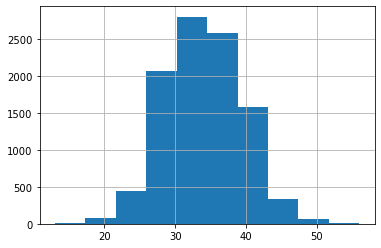

In [15]:
plt.grid(True)
plt.hist(averages_experiment);

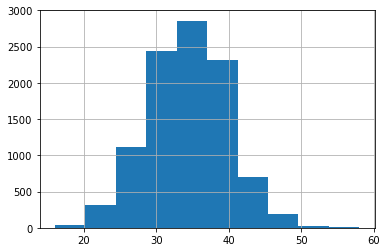

In [16]:
plt.grid(True)
plt.hist(averages_control);

In [17]:
a_expX = round(np.percentile(averages_experiment, 2.5), 2)
a_expY = round(np.percentile(averages_experiment, 97.5), 2)

In [18]:
a_conX = round(np.percentile(averages_control, 2.5), 2)
a_conY = round(np.percentile(averages_control, 97.5), 2)

In [19]:
print(f"We can say with 95% confidence that the average people who are in experiment group click on call to action is between {a_expX} and {a_expY}.")

We can say with 95% confidence that the average people who are in experiment group click on call to action is between 24.0 and 45.0.


In [20]:
print(f"We can say with 95% confidence that the average people who are in control group click on call to action is between {a_conX} and {a_conY}.")

We can say with 95% confidence that the average people who are in control group click on call to action is between 24.0 and 45.0.


In [21]:
# determining with actual data and not sample
df.query('group == "experiment" and action == "click"').action.count()

928

In [22]:
df.query('group == "control" and action == "click"').action.count()

932

In [23]:
# finding differece between people who clicked and people who viewed 


In [24]:
# Use Bootstrapping to determine how accurate your data is/will be.
diffs = []
for _ in range(10000):
    b_sample = df.sample(300, replace=False)
    e_c = b_sample.query('group == "experiment" and action == "click"').action.count()
    e_v = b_sample.query('group == "experiment" and action == "view"').action.count()
    diffs.append(e_v- e_c)

In [25]:
diffs

[70,
 78,
 65,
 72,
 78,
 77,
 71,
 75,
 62,
 66,
 81,
 86,
 77,
 71,
 89,
 73,
 82,
 64,
 74,
 81,
 76,
 85,
 76,
 80,
 96,
 88,
 82,
 78,
 68,
 91,
 81,
 100,
 83,
 63,
 52,
 59,
 77,
 84,
 73,
 88,
 79,
 88,
 79,
 79,
 59,
 88,
 63,
 93,
 80,
 69,
 71,
 58,
 85,
 83,
 64,
 65,
 81,
 62,
 87,
 70,
 75,
 65,
 84,
 77,
 72,
 72,
 48,
 74,
 59,
 65,
 65,
 73,
 72,
 74,
 90,
 65,
 86,
 77,
 94,
 69,
 76,
 65,
 67,
 72,
 69,
 81,
 82,
 74,
 74,
 104,
 76,
 83,
 78,
 69,
 63,
 78,
 78,
 73,
 79,
 63,
 82,
 85,
 65,
 87,
 63,
 82,
 51,
 83,
 74,
 89,
 80,
 79,
 108,
 77,
 93,
 81,
 54,
 74,
 65,
 68,
 69,
 84,
 71,
 60,
 77,
 73,
 89,
 57,
 79,
 55,
 66,
 77,
 91,
 89,
 83,
 65,
 59,
 67,
 66,
 75,
 84,
 65,
 96,
 65,
 69,
 86,
 87,
 80,
 95,
 66,
 60,
 66,
 72,
 71,
 46,
 73,
 66,
 81,
 70,
 59,
 89,
 66,
 78,
 61,
 85,
 103,
 58,
 65,
 81,
 47,
 66,
 66,
 55,
 65,
 74,
 82,
 93,
 83,
 88,
 82,
 71,
 79,
 81,
 80,
 80,
 65,
 63,
 65,
 85,
 69,
 78,
 90,
 78,
 77,
 71,
 69,
 98,
 91,
 90,
 

In [26]:
diffs_c = []
for _ in range(10000):
    b_sample2 = df.sample(300, replace=False)
    c_c = b_sample2.query('group == "control" and action == "click"').action.count()
    c_v = b_sample2.query('group == "control" and action == "view"').action.count()
    diffs_c.append(c_v - c_c)

In [27]:
diffs_c

[85,
 87,
 103,
 80,
 96,
 86,
 82,
 87,
 98,
 96,
 78,
 74,
 83,
 87,
 81,
 63,
 79,
 85,
 101,
 81,
 88,
 73,
 106,
 97,
 76,
 107,
 89,
 92,
 81,
 94,
 89,
 84,
 89,
 88,
 94,
 107,
 100,
 84,
 93,
 71,
 78,
 98,
 99,
 95,
 91,
 72,
 82,
 68,
 101,
 74,
 52,
 92,
 90,
 90,
 75,
 92,
 113,
 91,
 85,
 78,
 83,
 94,
 104,
 77,
 101,
 95,
 73,
 70,
 94,
 88,
 99,
 100,
 102,
 82,
 107,
 96,
 91,
 89,
 110,
 95,
 93,
 99,
 103,
 88,
 86,
 94,
 67,
 63,
 65,
 95,
 85,
 95,
 91,
 105,
 117,
 89,
 72,
 88,
 83,
 92,
 90,
 93,
 101,
 93,
 72,
 93,
 89,
 93,
 86,
 76,
 93,
 86,
 63,
 90,
 100,
 86,
 86,
 73,
 62,
 97,
 86,
 104,
 92,
 95,
 84,
 85,
 84,
 85,
 84,
 91,
 79,
 105,
 103,
 86,
 83,
 90,
 88,
 101,
 77,
 63,
 111,
 94,
 68,
 105,
 90,
 106,
 67,
 85,
 86,
 88,
 75,
 103,
 85,
 115,
 82,
 110,
 102,
 73,
 89,
 89,
 71,
 103,
 75,
 102,
 101,
 50,
 110,
 85,
 82,
 87,
 85,
 92,
 97,
 97,
 79,
 82,
 83,
 96,
 78,
 86,
 94,
 70,
 97,
 79,
 89,
 87,
 80,
 84,
 79,
 87,
 88,
 89,
 86,
 

(array([  14.,  105.,  569., 1604., 2623., 2705., 1659.,  579.,  116.,
          26.]),
 array([ 36. ,  43.9,  51.8,  59.7,  67.6,  75.5,  83.4,  91.3,  99.2,
        107.1, 115. ]),
 <BarContainer object of 10 artists>)

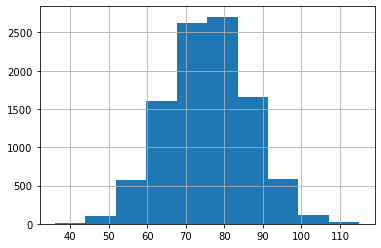

In [28]:
plt.grid(True)
plt.hist(diffs)

(array([  24.,  129.,  576., 1535., 2562., 2653., 1686.,  648.,  163.,
          24.]),
 array([ 48. ,  55.9,  63.8,  71.7,  79.6,  87.5,  95.4, 103.3, 111.2,
        119.1, 127. ]),
 <BarContainer object of 10 artists>)

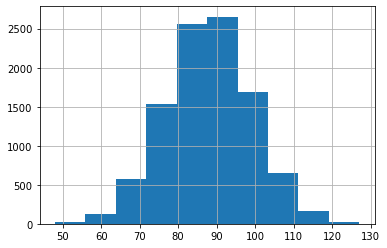

In [29]:
plt.grid(True)
plt.hist(diffs_c)

In [30]:
x = round(np.percentile(diffs, 2.5), 2)
y = round(np.percentile(diffs, 97.5), 2)

In [31]:
x

55.0

In [32]:
y

97.0

In [33]:
x2 = round(np.percentile(diffs_c, 2.5), 2)
y2 = round(np.percentile(diffs_c, 97.5), 2)

In [34]:
x2

65.0

In [35]:
y2

110.0

In [36]:
print(f"We can say with 95% confidence that the DIFFERENCE IN average rate of people in experiment group who click on action vs. who view on action is between {x} and {y}.")

We can say with 95% confidence that the DIFFERENCE IN average rate of people in experiment group who click on action vs. who view on action is between 55.0 and 97.0.


In [37]:
print(f"We can say with 95% confidence that the DIFFERENCE IN average rate of people in control group who click on action vs. who view on action is between {x2} and {y2}.")

We can say with 95% confidence that the DIFFERENCE IN average rate of people in control group who click on action vs. who view on action is between 65.0 and 110.0.


In [38]:
print("So, based on the data above, the feature used in control group is will get more click on action, threfore the company should go with that feature.")

So, based on the data above, the feature used in control group is will get more click on action, threfore the company should go with that feature.
